# Pre-requisites

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

# Ingestion

In [3]:
df = pd.read_csv('data/auto-mpg-treated.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    392 non-null    int64  
 1   mpg           392 non-null    float64
 2   cylinders     392 non-null    int64  
 3   displacement  392 non-null    float64
 4   horsepower    392 non-null    int64  
 5   weight        392 non-null    int64  
 6   acceleration  392 non-null    float64
 7   age           392 non-null    int64  
dtypes: float64(3), int64(5)
memory usage: 24.6 KB


all independent variables are numeric

# Univatiate Regression model

## Train, Test split

In [14]:
# 
X = df[['horsepower']]
y = df['mpg']

In [15]:
xTrain, xTest, yTrain, yTest = train_test_split(X,y, test_size=0.2)
print(xTrain.shape, xTest.shape, yTrain.shape, yTest.shape)

(313, 1) (79, 1) (313,) (79,)


In [16]:
xTrain.sample(5)

,horsepower
33,75
95,122
281,110
295,78
159,70


## Standardization

In [7]:
scaler = StandardScaler().fit(xTrain)
type(scaler)

sklearn.preprocessing._data.StandardScaler

In [8]:
# use the same scaler model to apply the same transformation to train and test set
xTrainScaled = scaler.transform(xTrain)
xTestScaled = scaler.transform(xTest)

## Training

In [9]:
model = LinearRegression().fit(xTrainScaled, yTrain)

In [10]:
# evaluating how the model performs on the training set
# R2 score measure how well the model captures variation in the training data
model.score(xTrainScaled, yTrain)

0.596477801276404

## Prediction

In [11]:
# predicting mpg using the model fit with horsepower
yPred = model.predict(xTestScaled)
yPred.shape

(79,)

In [12]:
# evaluating how the model performs on the test set
# R2 score measure how well the model captures variation in the test data
r2_score(yTest, yPred)

0.6410093499340181

model's performance on the test set is poorer than the training set. there might be slight overfitting.

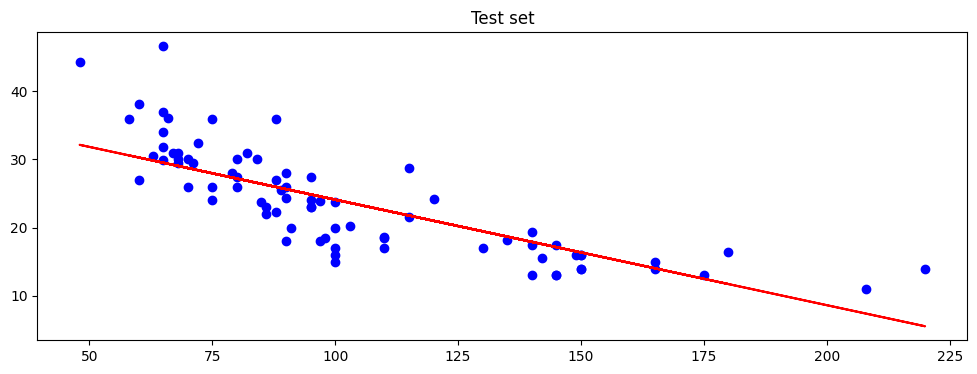

In [13]:
# visualizing the model and the test data

plt.figure(figsize=(12,4))
plt.scatter(xTest, yTest, color='b')
plt.plot(xTest, yPred, color='r')
plt.title('Test set')
plt.show()

# Multivariate Regression

## Train, Test split

In [17]:
# 
X = df[['displacement', 'horsepower', 'weight']]
y = df['mpg']

In [18]:
xTrain, xTest, yTrain, yTest = train_test_split(X,y, test_size=0.2)
print(xTrain.shape, xTest.shape, yTrain.shape, yTest.shape)

(313, 3) (79, 3) (313,) (79,)


In [19]:
xTrain.sample(5)

,displacement,horsepower,weight
12,400.0,150,4997
39,97.0,67,1985
141,91.0,67,1850
78,97.0,60,1834
334,146.0,67,3250


## Standardization

In [20]:
scaler = StandardScaler().fit(xTrain)
type(scaler)

sklearn.preprocessing._data.StandardScaler

In [21]:
# use the same scaler model to apply the same transformation to train and test set
xTrainScaled = scaler.transform(xTrain)
xTestScaled = scaler.transform(xTest)

## Training

In [22]:
model = LinearRegression().fit(xTrainScaled, yTrain)

In [23]:
# evaluating how the model performs on the training set
# R2 score measure how well the model captures variation in the training data
model.score(xTrainScaled, yTrain)

0.7133802896842838

## Prediction

In [24]:
# predicting mpg using the model fit with horsepower
yPred = model.predict(xTestScaled)
yPred.shape

(79,)

## Inspecting the model

In [29]:
# coefficients of the linear model
pd.Series(model.coef_, xTrain.columns).sort_values()

weight         -4.556697
horsepower     -1.285185
displacement   -0.919663
dtype: float64

In [25]:
# evaluating how the model performs on the test set
# R2 score measure how well the model captures variation in the test data
r2_score(yTest, yPred)

0.6759502113223097